In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import os
from scipy.stats import pearsonr
import math

In [2]:
path = os.getcwd()
print(path)
path_new='D:\Term Project\project'
os.chdir(path_new)

C:\Users\19195


In [3]:
path = os.getcwd()
print(path)

D:\Term Project\project


In [4]:
data=pd.read_csv('D:\CE 705 TRB\Sumo\IDM.csv')

In [41]:
datar=pd.read_csv('D:\AV data\Vicolungo-20210204T205759Z-001\Vicolungo\VC_JRC_260219_part2_mixed.csv')

In [5]:
data.head()

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,89.87,TV,e1_0,5.10,0.0,0.0,TV,-182.88,61.95
1,0.1,89.87,TV,e1_0,5.12,0.0,0.2,TV@TV,-182.86,61.95
2,0.2,89.87,TV,e1_0,5.16,0.0,0.4,TV@TV,-182.82,61.95
3,0.3,89.87,TV,e1_0,5.22,0.0,0.6,TV@TV,-182.76,61.95
4,0.4,89.87,TV,e1_0,5.30,0.0,0.8,TV@TV,-182.68,61.95


In [6]:
data

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,89.87,TV,e1_0,5.10,0.0,0.00,TV,-182.88,61.95
1,0.1,89.87,TV,e1_0,5.12,0.0,0.20,TV@TV,-182.86,61.95
2,0.2,89.87,TV,e1_0,5.16,0.0,0.40,TV@TV,-182.82,61.95
3,0.3,89.87,TV,e1_0,5.22,0.0,0.60,TV@TV,-182.76,61.95
4,0.4,89.87,TV,e1_0,5.30,0.0,0.80,TV@TV,-182.68,61.95
...,...,...,...,...,...,...,...,...,...,...
26911,545.6,90.03,AV4,e4_0,87.63,0.0,32.38,AV4@AV4,1530.97,62.66
26912,545.7,90.03,AV4,e4_0,90.88,0.0,32.52,AV4@AV4,1533.14,62.66
26913,545.8,90.03,AV4,e4_0,94.14,0.0,32.65,AV4@AV4,1535.32,62.66
26914,545.9,90.03,AV4,e4_0,97.42,0.0,32.78,AV4@AV4,1537.51,62.66


In [7]:
data['serial']=data['timestep_time']*10
data=data.set_index('serial')
data

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
serial,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,0.00,TV,-182.88,61.95
1.0,0.1,89.87,TV,e1_0,5.12,0.0,0.20,TV@TV,-182.86,61.95
2.0,0.2,89.87,TV,e1_0,5.16,0.0,0.40,TV@TV,-182.82,61.95
3.0,0.3,89.87,TV,e1_0,5.22,0.0,0.60,TV@TV,-182.76,61.95
4.0,0.4,89.87,TV,e1_0,5.30,0.0,0.80,TV@TV,-182.68,61.95
...,...,...,...,...,...,...,...,...,...,...
5456.0,545.6,90.03,AV4,e4_0,87.63,0.0,32.38,AV4@AV4,1530.97,62.66
5457.0,545.7,90.03,AV4,e4_0,90.88,0.0,32.52,AV4@AV4,1533.14,62.66
5458.0,545.8,90.03,AV4,e4_0,94.14,0.0,32.65,AV4@AV4,1535.32,62.66


In [8]:
df=data.groupby('vehicle_id')

In [9]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='TV') 
df0, df1 = [x for _, x in data.groupby(data['v_id'] == True)]
df1

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
0.0,0.0,89.87,TV,e1_0,5.10,0.0,0.00,TV,-182.88,61.95,True
1.0,0.1,89.87,TV,e1_0,5.12,0.0,0.20,TV@TV,-182.86,61.95,True
2.0,0.2,89.87,TV,e1_0,5.16,0.0,0.40,TV@TV,-182.82,61.95,True
3.0,0.3,89.87,TV,e1_0,5.22,0.0,0.60,TV@TV,-182.76,61.95,True
4.0,0.4,89.87,TV,e1_0,5.30,0.0,0.80,TV@TV,-182.68,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5401.0,540.1,90.03,TV,e4_0,86.38,0.0,31.60,TV@TV,1530.14,62.67,True
5402.0,540.2,90.03,TV,e4_0,89.54,0.0,31.60,TV@TV,1532.25,62.66,True
5403.0,540.3,90.03,TV,e4_0,92.70,0.0,31.61,TV@TV,1534.36,62.66,True


In [10]:
df1['vehicle_speed'][0:100].describe()

count    101.000000
mean      10.000000
std        5.860034
min        0.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: vehicle_speed, dtype: float64

In [11]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV1')
df0, df2 = [x for _, x in data.groupby(data['v_id'] == True)]
df2

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
26.0,2.6,89.87,AV1,e1_0,5.10,0.0,0.00,AV1,-182.88,61.95,True
27.0,2.7,89.87,AV1,e1_0,5.10,0.0,0.01,AV1@AV1,-182.87,61.95,True
28.0,2.8,89.87,AV1,e1_0,5.13,0.0,0.25,AV1@AV1,-182.85,61.95,True
29.0,2.9,89.87,AV1,e1_0,5.18,0.0,0.59,AV1@AV1,-182.79,61.95,True
30.0,3.0,89.87,AV1,e1_0,5.28,0.0,0.98,AV1@AV1,-182.69,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5417.0,541.7,90.03,AV1,e4_0,83.99,0.0,33.54,AV1@AV1,1528.55,62.67,True
5418.0,541.8,90.03,AV1,e4_0,87.36,0.0,33.69,AV1@AV1,1530.79,62.67,True
5419.0,541.9,90.03,AV1,e4_0,90.74,0.0,33.84,AV1@AV1,1533.05,62.66,True


In [12]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV2')
df0, df3 = [x for _, x in data.groupby(data['v_id'] == True)]
df3

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
46.0,4.6,89.87,AV2,e1_0,5.10,0.0,0.00,AV2,-182.88,61.95,True
47.0,4.7,89.87,AV2,e1_0,5.10,0.0,0.05,AV2@AV2,-182.87,61.95,True
48.0,4.8,89.87,AV2,e1_0,5.12,0.0,0.15,AV2@AV2,-182.86,61.95,True
49.0,4.9,89.87,AV2,e1_0,5.15,0.0,0.28,AV2@AV2,-182.83,61.95,True
50.0,5.0,89.87,AV2,e1_0,5.19,0.0,0.43,AV2@AV2,-182.79,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5432.0,543.2,90.03,AV2,e4_0,84.33,0.0,32.23,AV2@AV2,1528.77,62.67,True
5433.0,543.3,90.03,AV2,e4_0,87.56,0.0,32.29,AV2@AV2,1530.93,62.66,True
5434.0,543.4,90.03,AV2,e4_0,90.79,0.0,32.36,AV2@AV2,1533.09,62.66,True


In [13]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV3')
df0, df4 = [x for _, x in data.groupby(data['v_id'] == True)]
df4

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
76.0,7.6,89.87,AV3,e1_0,5.10,0.0,0.00,AV3,-182.88,61.95,True
77.0,7.7,89.87,AV3,e1_0,5.10,0.0,0.03,AV3@AV3,-182.87,61.95,True
78.0,7.8,89.87,AV3,e1_0,5.11,0.0,0.10,AV3@AV3,-182.86,61.95,True
79.0,7.9,89.87,AV3,e1_0,5.13,0.0,0.18,AV3@AV3,-182.84,61.95,True
80.0,8.0,89.87,AV3,e1_0,5.16,0.0,0.28,AV3@AV3,-182.82,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5444.0,544.4,90.03,AV3,e4_0,84.81,0.0,31.66,AV3@AV3,1529.09,62.67,True
5445.0,544.5,90.03,AV3,e4_0,87.98,0.0,31.72,AV3@AV3,1531.21,62.66,True
5446.0,544.6,90.03,AV3,e4_0,91.16,0.0,31.77,AV3@AV3,1533.33,62.66,True


In [14]:
data['v_id'] = (data['vehicle_id'].str[0:3]=='AV4')
df0, df5 = [x for _, x in data.groupby(data['v_id'] == True)]
df5

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y,v_id
serial,,,,,,,,,,,
111.0,11.1,89.87,AV4,e1_0,5.10,0.0,0.00,AV4,-182.88,61.95,True
112.0,11.2,89.87,AV4,e1_0,5.11,0.0,0.12,AV4@AV4,-182.86,61.95,True
113.0,11.3,89.87,AV4,e1_0,5.14,0.0,0.31,AV4@AV4,-182.83,61.95,True
114.0,11.4,89.87,AV4,e1_0,5.20,0.0,0.56,AV4@AV4,-182.78,61.95,True
115.0,11.5,89.87,AV4,e1_0,5.28,0.0,0.84,AV4@AV4,-182.69,61.95,True
...,...,...,...,...,...,...,...,...,...,...,...
5455.0,545.5,90.03,AV4,e4_0,84.39,0.0,32.23,AV4@AV4,1528.81,62.67,True
5456.0,545.6,90.03,AV4,e4_0,87.63,0.0,32.38,AV4@AV4,1530.97,62.66,True
5457.0,545.7,90.03,AV4,e4_0,90.88,0.0,32.52,AV4@AV4,1533.14,62.66,True


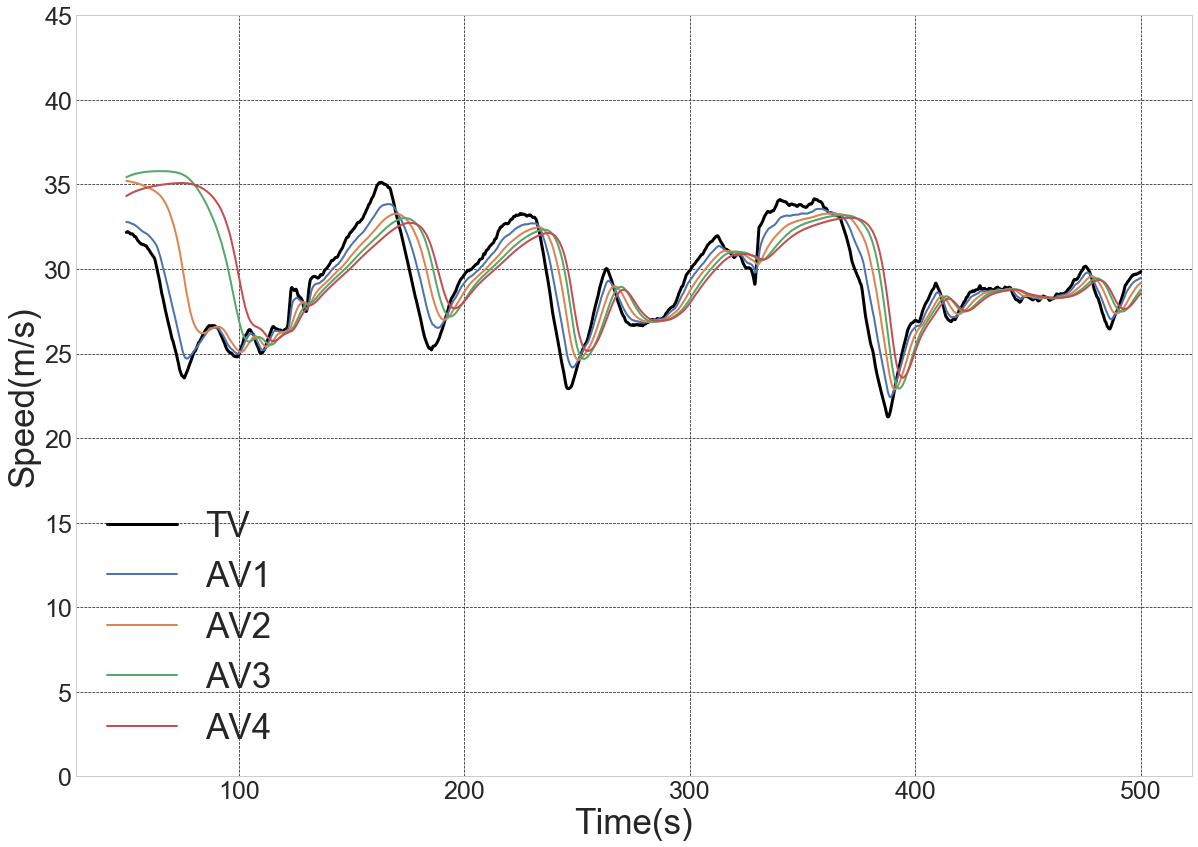

In [48]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(df1['timestep_time'][500:5000], df1['vehicle_speed'][500:5000],linewidth=3, color='black', label='TV')
plt.plot(df2['timestep_time'][500:5000], df2['vehicle_speed'][500:5000], linewidth=2, label='AV1')
plt.plot(df3['timestep_time'][500:5000], df3['vehicle_speed'][500:5000],linewidth=2, label='AV2')
plt.plot(df4['timestep_time'][500:5000], df4['vehicle_speed'][500:5000], linewidth=2,label='AV3')
plt.plot(df5['timestep_time'][500:5000], df5['vehicle_speed'][500:5000], linewidth=2,label='AV4')
#plt.title('Speed vs Time (IDM Model Simulation)',size=22)
plt.xlabel('Time(s)', size=35)
plt.ylabel('Speed(m/s)',size=35)
#plt.xlim(0,1600)
plt.ylim(0,45)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=3, prop={'size': 35})
plt.savefig("Cali_SVTSI.jpg", dpi=300)

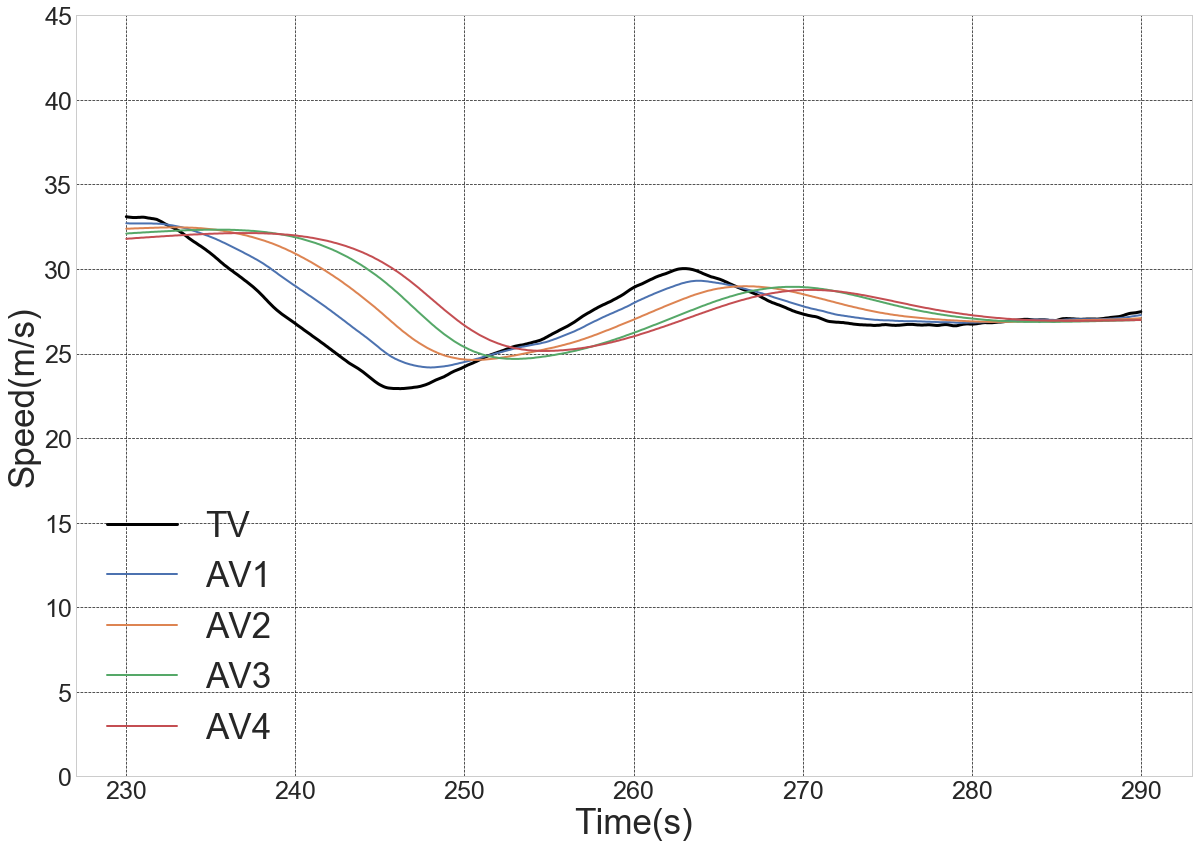

In [47]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.plot(df1['timestep_time'][2300:2900], df1['vehicle_speed'][2300:2900],linewidth=3, color='black', label='TV')
plt.plot(df2['timestep_time'][2300:2900], df2['vehicle_speed'][2300:2900],linewidth=2, label='AV1')
plt.plot(df3['timestep_time'][2300:2900], df3['vehicle_speed'][2300:2900],linewidth=2, label='AV2')
plt.plot(df4['timestep_time'][2300:2900], df4['vehicle_speed'][2300:2900],linewidth=2, label='AV3')
plt.plot(df5['timestep_time'][2300:2900], df5['vehicle_speed'][2300:2900],linewidth=2, label='AV4')
#plt.title('Speed vs Time (IDM Model Simulation)', size=22)
plt.xlabel('Time(s)', size=35)
plt.ylabel('Speed(m/s)', size=35)
#plt.xlim(0,1600)
plt.ylim(0,45)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=3, prop={'size': 35})
plt.savefig("Cali_SVTSIM.jpg", dpi=300)

In [46]:
from scipy.stats import ks_2samp
ks_2samp(datar['Speed5'], df5['vehicle_speed'])

Ks_2sampResult(statistic=0.184246874847616, pvalue=1.0)

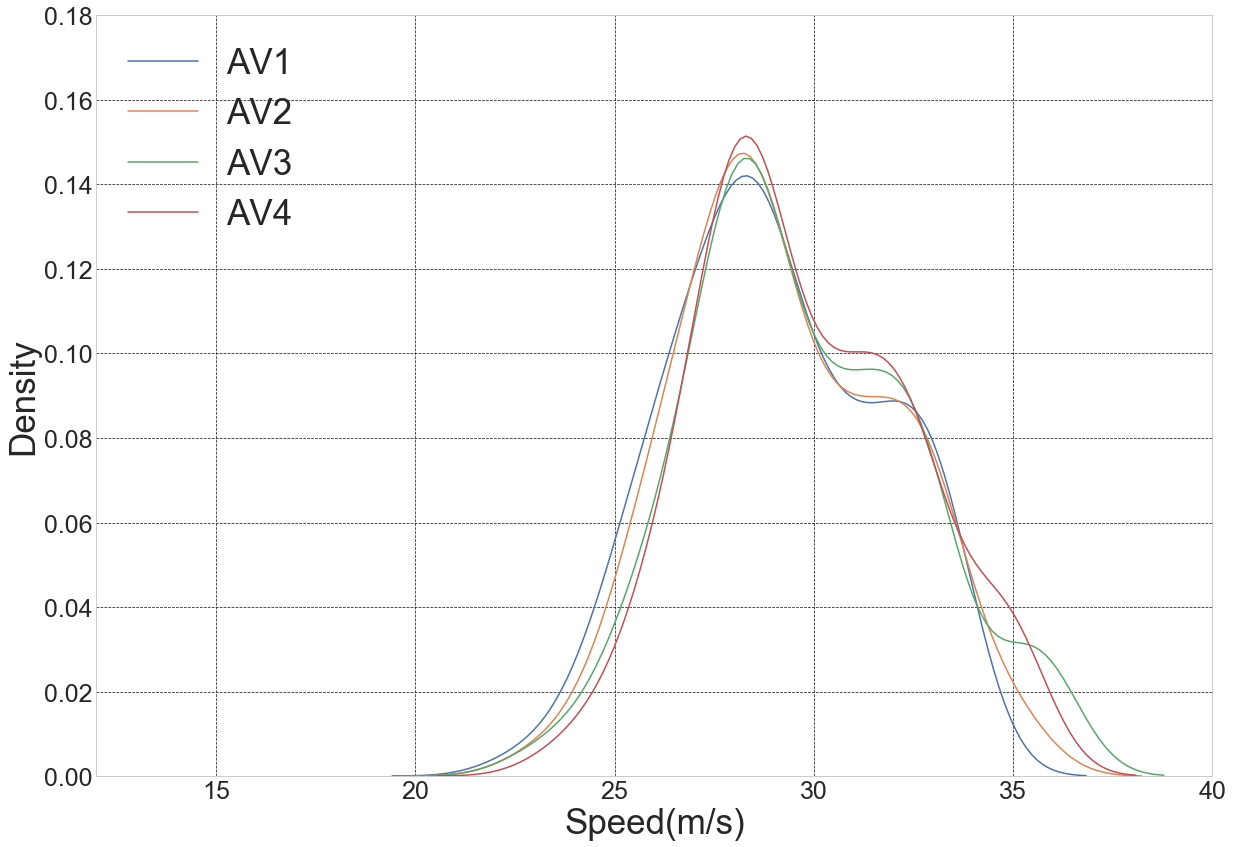

In [49]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
#sns.kdeplot( df1['vehicle_speed'][500:5000],color='black',bw=1,linewidth=3, label='TV')
sns.kdeplot( df2['vehicle_speed'][500:5000], bw=1,label='AV1')
sns.kdeplot(df3['vehicle_speed'][500:5000], bw=1,label='AV2')
sns.kdeplot(df4['vehicle_speed'][500:5000],bw=1, label='AV3')
sns.kdeplot(df5['vehicle_speed'][500:5000],bw=1, label='AV4')
#plt.title('KDE of Speed (IDM Model Simulation)', size=22)
plt.xlabel('Speed(m/s)',size=35)
plt.ylabel('Density',size=35)
plt.xlim(12,40)
plt.ylim(0,.18)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.rcParams.update({'font.size': 35})
plt.legend(loc=2, prop={'size': 35})
plt.savefig("Cali_KDESI.jpg", dpi=300)

In [18]:
df1['vehicle_pos'][68]

30.18

In [19]:
#timegap
tgap1=[0.0]*len(df5['timestep_time'][500:5000])
tgap2=[0.0]*len(df5['timestep_time'][500:5000])
tgap3=[0.0]*len(df5['timestep_time'][500:5000])
tgap4=[0.0]*len(df5['timestep_time'][500:5000])

j=0
for i in range(500,5000):
    tgap1[j]=(df1['vehicle_pos'][i]-df2['vehicle_pos'][i])/(df2['vehicle_speed'][i])
    tgap2[j]=(df2['vehicle_pos'][i]-df3['vehicle_pos'][i])/(df3['vehicle_speed'][i])
    tgap3[j]=(df3['vehicle_pos'][i]-df4['vehicle_pos'][i])/(df4['vehicle_speed'][i])
    tgap4[j]=(df4['vehicle_pos'][i]-df5['vehicle_pos'][i])/(df5['vehicle_speed'][i]) 
    j=j+1

tgap1=pd.DataFrame(tgap1)
tgap2=pd.DataFrame(tgap2)
tgap3=pd.DataFrame(tgap3)
tgap4=pd.DataFrame(tgap4)

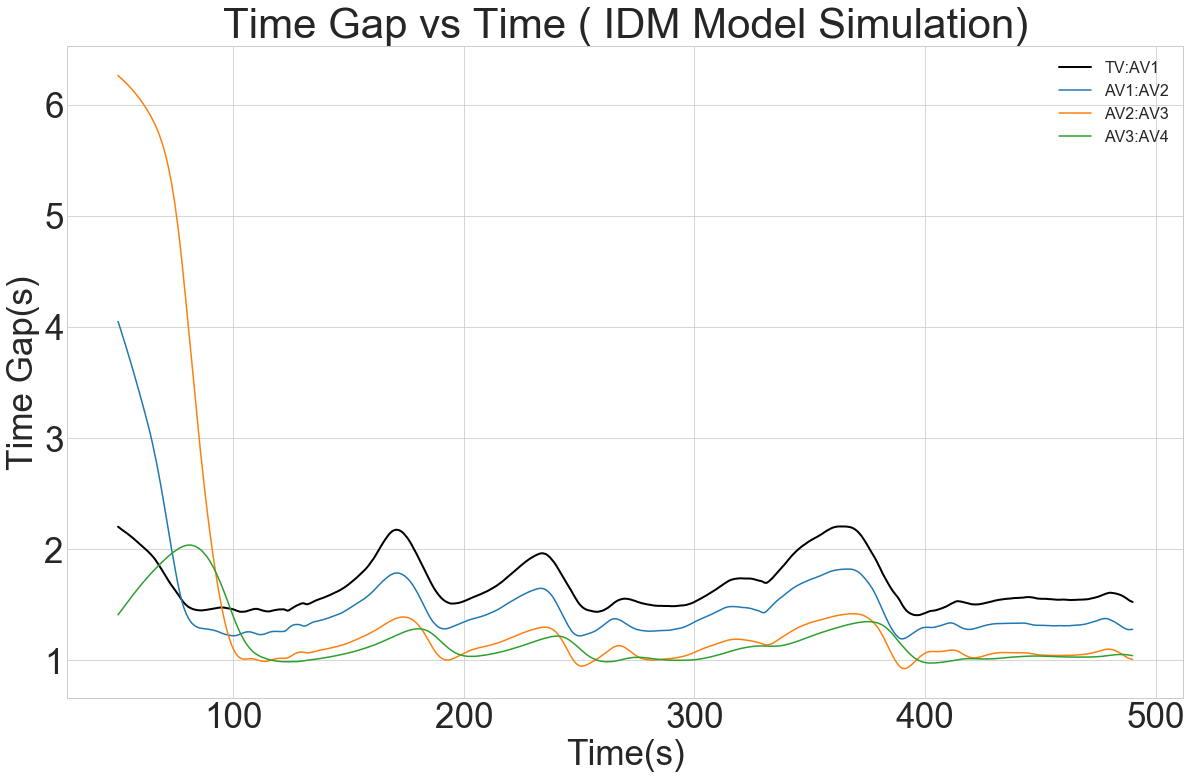

In [20]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df5['timestep_time'][500:4900], tgap1[0][0:4401],linewidth=2, color='black', label='TV:AV1')
plt.plot(df5['timestep_time'][500:4900], tgap2[0][0:4401],label='AV1:AV2')
plt.plot(df5['timestep_time'][500:4900], tgap3[0][0:4401],label='AV2:AV3')
plt.plot(df5['timestep_time'][500:4900], tgap4[0][0:4401],label='AV3:AV4')
plt.title('Time Gap vs Time ( IDM Model Simulation)')
plt.xlabel('Time(s)')
plt.ylabel('Time Gap(s)')
#plt.xlim(0,1600)
#plt.ylim(0,45)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=1, prop={'size': 16})

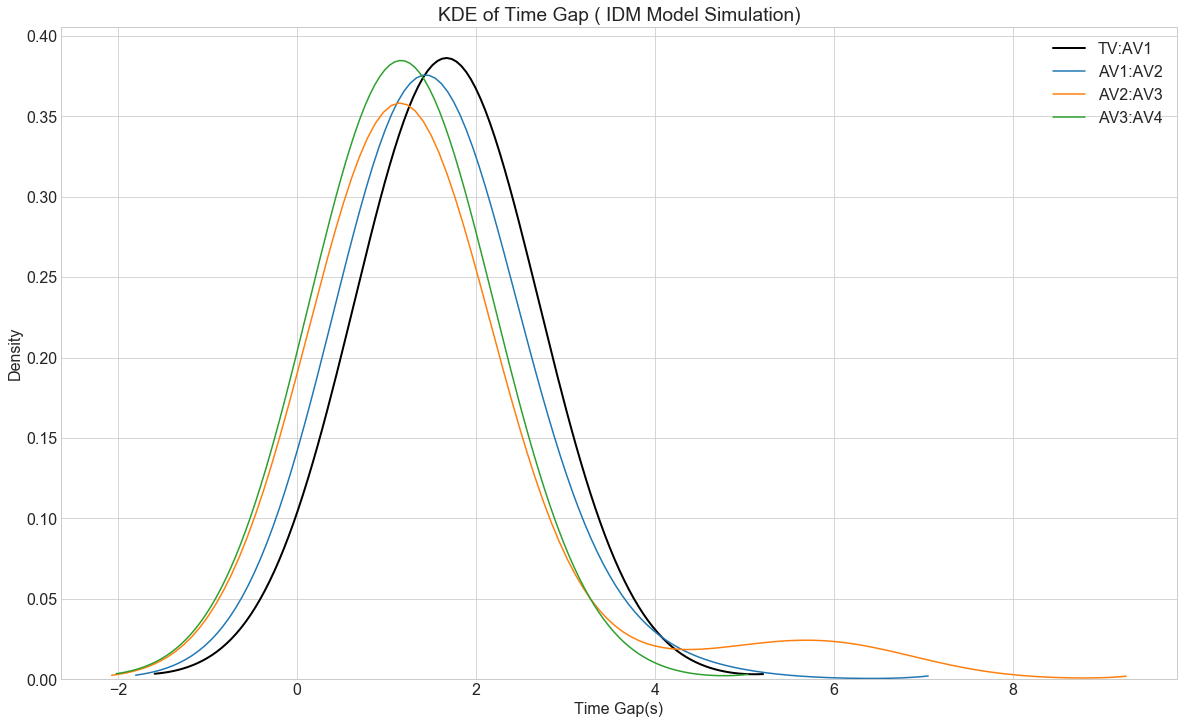

In [21]:
plt.rcParams["figure.figsize"] = (20,12)
sns.kdeplot(tgap1[0][0:4401], bw=1, color='black', linewidth=2, label='TV:AV1')
sns.kdeplot( tgap2[0][0:4401],bw=1, label='AV1:AV2')
sns.kdeplot( tgap3[0][0:4401],bw=1, label='AV2:AV3')
sns.kdeplot( tgap4[0][0:4401],bw=1, label='AV3:AV4')
plt.title('KDE of Time Gap ( IDM Model Simulation)')
plt.xlabel('Time Gap(s)')
plt.ylabel('Density')
#plt.xlim(0,1200)
#plt.ylim(0,5)
plt.rcParams.update({'font.size': 16})
plt.legend(loc=1, prop={'size': 16})

In [51]:
#accleration
ac1=[0.0]*len(df1['timestep_time'][500:5000])
ac2=[0.0]*len(df2['timestep_time'][500:5000])
ac3=[0.0]*len(df3['timestep_time'][500:5000])
ac4=[0.0]*len(df4['timestep_time'][500:5000])
ac5=[0.0]*len(df5['timestep_time'][500:5000])
j = 0
for i in range(500,5000):
    ac1[j]=((df1['vehicle_speed'][i+1]-df1['vehicle_speed'][i])/0.1)
    ac2[j]=((df2['vehicle_speed'][i+1]-df2['vehicle_speed'][i])/0.1)
    ac3[j]=((df3['vehicle_speed'][i+1]-df3['vehicle_speed'][i])/0.1)
    ac4[j]=((df4['vehicle_speed'][i+1]-df4['vehicle_speed'][i])/0.1)
    ac5[j]=((df5['vehicle_speed'][i+1]-df5['vehicle_speed'][i])/0.1)
    j = j + 1
ac1=pd.DataFrame(ac1)
ac2=pd.DataFrame(ac2)
ac3=pd.DataFrame(ac3)
ac4=pd.DataFrame(ac4)
ac5=pd.DataFrame(ac5)

In [23]:
#relative distance
rd1=[0.0]*len(df1['timestep_time'][500:5000])
rd2=[0.0]*len(df2['timestep_time'][500:5000])
rd3=[0.0]*len(df3['timestep_time'][500:5000])
rd4=[0.0]*len(df4['timestep_time'][500:5000])

j = 0
for i in range(500,5000):
    rd1[j]=(df1['vehicle_pos'][i]-df2['vehicle_pos'][i])
    rd2[j]=(df2['vehicle_pos'][i]-df3['vehicle_pos'][i])
    rd3[j]=(df3['vehicle_pos'][i]-df4['vehicle_pos'][i])
    rd4[j]=(df4['vehicle_pos'][i]-df5['vehicle_pos'][i]) 
    j = j + 1
rd1=pd.DataFrame(rd1)
rd2=pd.DataFrame(rd2)
rd3=pd.DataFrame(rd3)
rd4=pd.DataFrame(rd4)


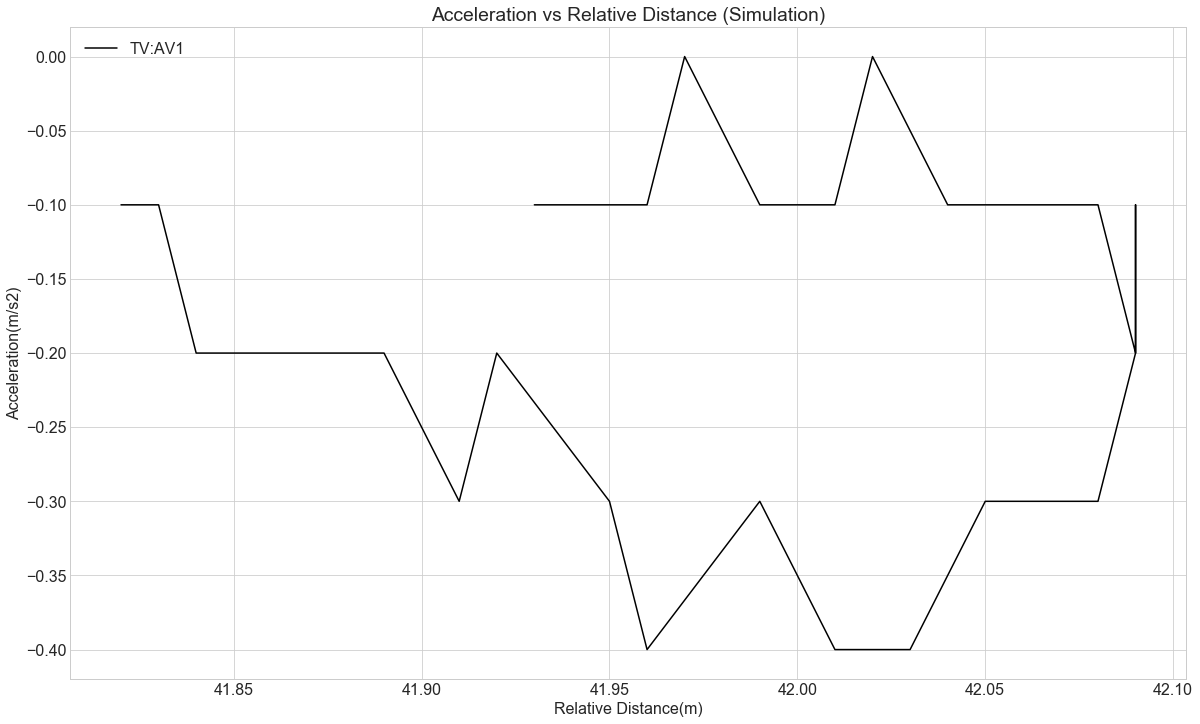

In [24]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(rd1[0][770:800], ac2[0][770:800], color='black', label='TV:AV1')
#plt.plot(rd2[0], ac3[0], label='AV1:AV2')
#plt.plot(rd3[0], ac4[0], label='AV3:AV4')
#plt.plot(rd4[0], ac5[0], label='AV4:AV5')
plt.title('Acceleration vs Relative Distance (Simulation)')
plt.xlabel('Relative Distance(m)')
plt.ylabel('Acceleration(m/s2)')
#plt.ylim(-5,5)
plt.legend(loc=2, prop={'size': 16})

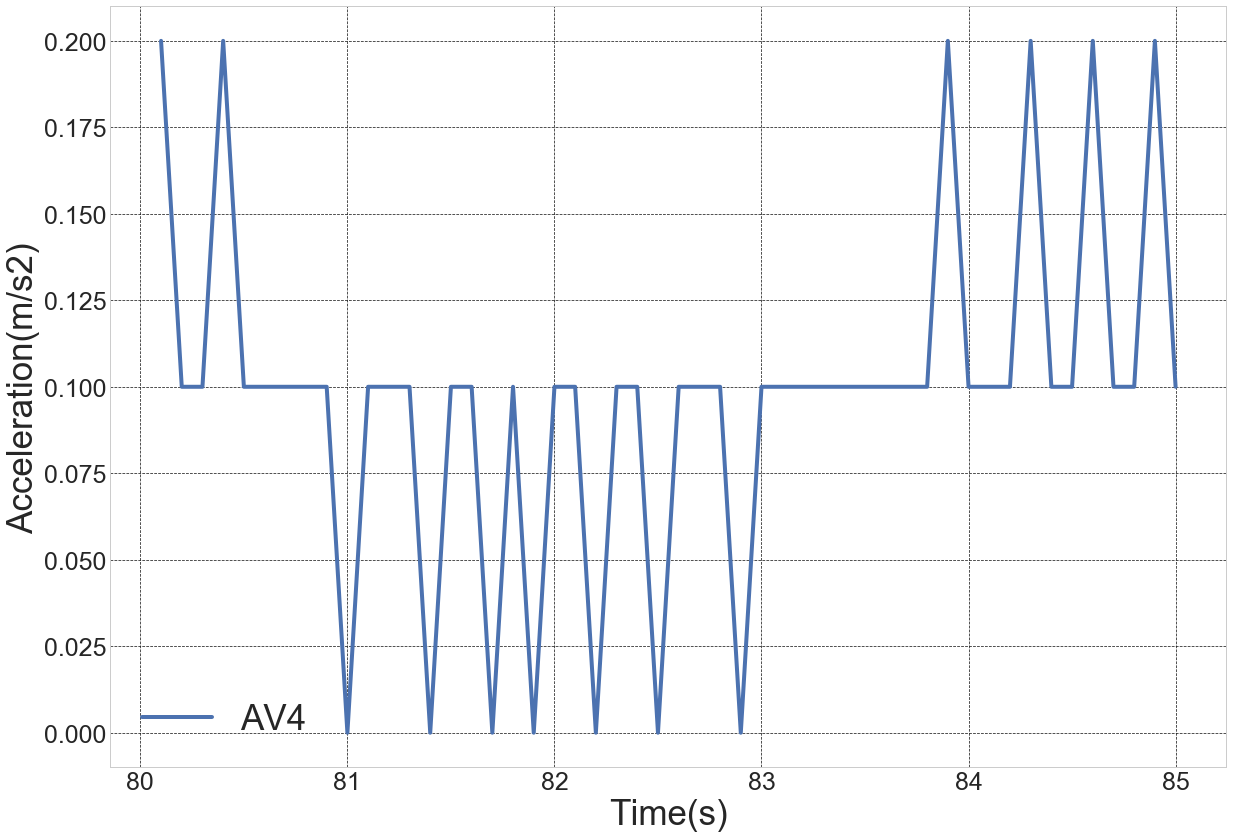

In [61]:
plt.rcParams["figure.figsize"] = (20,14)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
#plt.plot(df1['timestep_time'][801:850], ac2[0][800:850],linewidth=4, label='AV1')
#plt.plot(df1['timestep_time'][801:850], ac3[0][800:850],linewidth=4, label='AV2')
#plt.plot(df1['timestep_time'][801:850], ac4[0][800:850],linewidth=4, label='AV3')
plt.plot(df1['timestep_time'][801:850], ac5[0][800:850],linewidth=4, label='AV4')
#plt.title('Acceleration vs Time of AVs (IDM Simulation)', size = 20)
plt.xlabel('Time(s)', size = 35)
plt.ylabel('Acceleration(m/s2)', size = 35)
plt.xticks(size = 25)
plt.yticks(size = 25)
#plt.ylim(0,0.34)
plt.grid(color='k', linestyle='--', linewidth=0.75)
plt.legend(loc=3, prop={'size': 35})
plt.savefig("Cali_av4aci.jpg", dpi=300)

In [26]:
from scipy import stats
sns.set(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd1[0],ac2[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd2[0],ac3[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd3[0],ac4[0])
print(slope, intercept, p_value, r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(rd4[0],ac5[0])
print(slope, intercept, p_value, r_value**2)

-0.006316960167066631 0.3023625942441705 1.6893865126421041e-60 0.05808826129204352
-0.001629441117548027 0.05974344072667148 1.0431522653316625e-14 0.013208190926248257
-0.0001926053796031285 -0.005802300835169763 0.02183991252713384 0.0011682608434538668
-0.0036412027236527836 0.11619824411079518 1.220802931802797e-31 0.029990241746705646


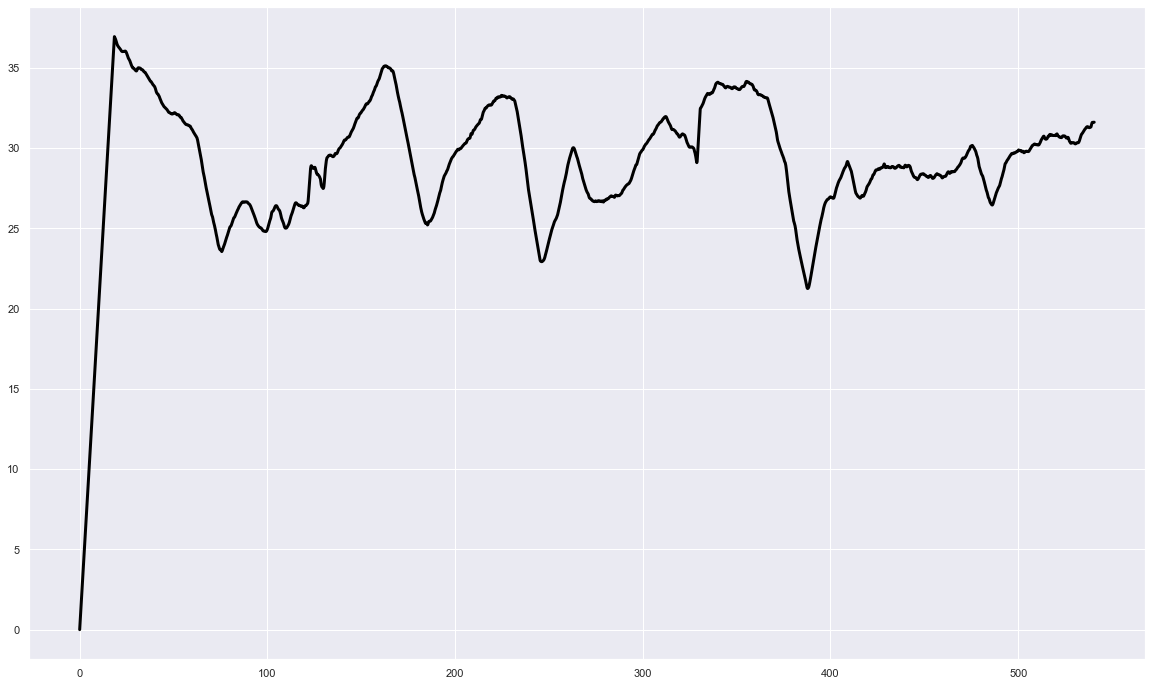

In [27]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df1['timestep_time'], df1['vehicle_speed'],linewidth=3, color='black', label='TV')

In [28]:
df1['vehicle_speed']

serial
0.0        0.00
1.0        0.20
2.0        0.40
3.0        0.60
4.0        0.80
          ...  
5401.0    31.60
5402.0    31.60
5403.0    31.61
5404.0    31.61
5405.0    31.61
Name: vehicle_speed, Length: 5406, dtype: float64

In [29]:
print(pearsonr( rd1[0], ac2[0]))
print(pearsonr( rd2[0], ac3[0]))
print(pearsonr( rd3[0], ac4[0]))
print(pearsonr( rd4[0], ac5[0]))

(-0.24101506445042725, 1.6893865126548445e-60)
(-0.11492689383363773, 1.0431522653396051e-14)
(-0.03417983094536698, 0.021839912527300467)
(-0.17317690881496187, 1.2208029318120406e-31)


In [30]:
datar=pd.read_csv('D:\AV data\Vicolungo-20210204T205759Z-001\Vicolungo\VC_JRC_260219_part2_mixed.csv')

In [31]:
d1=[0.0]*len(df1['timestep_time'][500:5000])
d2=[0.0]*len(df2['timestep_time'][500:5000])
d3=[0.0]*len(df3['timestep_time'][500:5000])
d4=[0.0]*len(df4['timestep_time'][500:5000])
j=0
for i in range(500,5000):
    d1[j]=abs(df2['vehicle_speed'][i]-datar['Speed2'][i])
    d2[j]=abs(df3['vehicle_speed'][i]-datar['Speed3'][i])
    d3[j]=abs(df4['vehicle_speed'][i]-datar['Speed4'][i])
    d4[j]=abs(df5['vehicle_speed'][i]-datar['Speed5'][i])
    j = j + 1
d1=pd.DataFrame(d1)
d2=pd.DataFrame(d2)
d3=pd.DataFrame(d3)
d4=pd.DataFrame(d4)

In [32]:
d1[0]

0       0.631428
1       0.638344
2       0.625538
3       0.619531
4       0.619015
          ...   
4496    0.638059
4497    0.661412
4498    0.692321
4499    0.722505
4500    0.000000
Name: 0, Length: 4501, dtype: float64

In [33]:
d4[0].sum(axis = 0, skipna = True)/math.sqrt(4501)

193.78370004219903

In [34]:
(d1[0].sum(axis = 0, skipna = True)+d2[0].sum(axis = 0, skipna = True)+d3[0].sum(axis = 0, skipna = True)+d4[0].sum(axis = 0, skipna = True))/(4501*4)

1.9041700763980223

In [35]:
print(pearsonr( rd1[0], ac2[0]))
print(pearsonr( rd2[0], ac3[0]))
print(pearsonr( rd3[0], ac4[0]))
print(pearsonr( rd4[0], ac5[0]))

(-0.24101506445042725, 1.6893865126548445e-60)
(-0.11492689383363773, 1.0431522653396051e-14)
(-0.03417983094536698, 0.021839912527300467)
(-0.17317690881496187, 1.2208029318120406e-31)


In [36]:
ac2 = ac2.rename(columns={0:'ac2'})
ac3 = ac3.rename(columns={0:'ac3'})
ac4 = ac4.rename(columns={0:'ac4'})
ac5 = ac5.rename(columns={0:'ac5'})
rd1 = rd1.rename(columns={0:'rd1'})
rd2 = rd2.rename(columns={0:'rd2'})
rd3 = rd3.rename(columns={0:'rd3'})
rd4 = rd4.rename(columns={0:'rd4'})

In [37]:
df2r=pd.concat([ac2, rd1], axis=1).reindex(ac2.index)
df3r=pd.concat([ac3, rd2], axis=1).reindex(ac3.index)
df4r=pd.concat([ac4, rd3], axis=1).reindex(ac4.index)
df5r=pd.concat([ac5, rd4], axis=1).reindex(ac4.index)

In [38]:
df2r

,ac2,rd1
0,0.0,72.26
1,-0.1,72.20
2,0.0,72.14
3,0.0,72.08
4,0.0,72.03
...,...,...
4496,0.1,45.97
4497,0.1,46.01
4498,0.1,46.04
4499,0.1,46.08


In [39]:
df5r['AC5'] = (df5r['ac5'] >= 0) 
dfn, dfp = [x for _, x in df5r.groupby(df5r['AC5'] == True)]
dfn

,ac5,rd4,AC5
255,-0.1,70.06,False
267,-0.1,70.57,False
273,-0.1,70.78,False
279,-0.1,70.96,False
283,-0.1,71.06,False
...,...,...,...
4416,-0.1,28.69,False
4417,-0.1,28.68,False
4419,-0.1,28.65,False
4421,-0.1,28.61,False


In [40]:
print(pearsonr(dfn['rd4'], dfn['ac5']))

(0.06776196821158698, 0.01879584838861777)
